# Applied Machine Learning HomeWork 1
Due 09/29/21 11:59pm

## Task 1: Data Visualization and Analysis

You can download the FIFA 19 complete dataset from

https://www.kaggle.com/karangadiya/fifa19

Please replace the value of PATH_TO_DATASET variable in the following block with the path to your dataset

In [2]:
# import modules, read data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## TODO: Replace with the path to your dataset
PATH_TO_DATASET = './data.csv' 
############################################################

df = pd.read_csv(PATH_TO_DATASET, index_col=0)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### 1.1 

Create a **scatter plot** of the Age vs Overall Rating. **Ensure the axes are labeled
properly.**

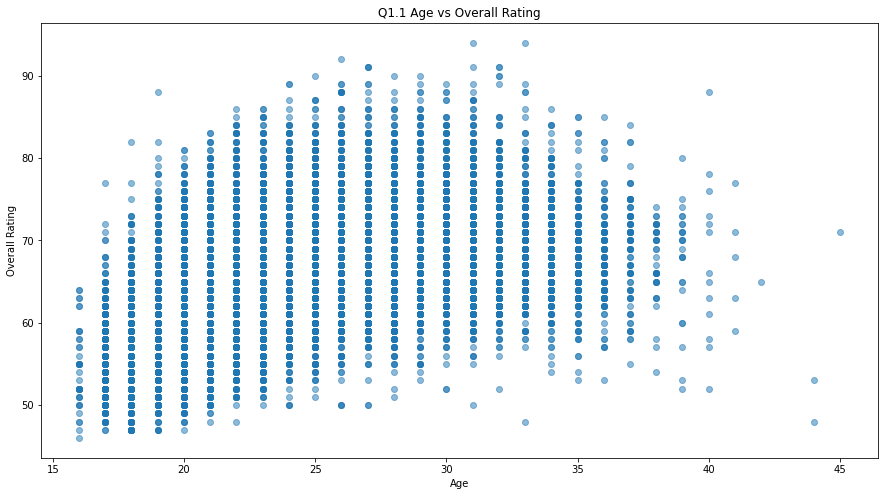

In [3]:
plt.figure(figsize=(15, 8))
plt.xlabel("Age")
plt.ylabel("Overall Rating")
plt.title('Q1.1 Age vs Overall Rating')
plt.scatter(df.Age, df.Overall, alpha=0.5)
plt.show()

### 1.2

Visualize the distribution of Overall Rating as a **histogram**. 

Do a small multiples plot of whether the player's prefered foot is left, i.e. do **one plot** of Overall Rating distribution for those players prefered left foot and **a separate** for those who prefer right foot (**within the same figure on separate axes**). **Ensure the axes are labeled properly and titles are added.**

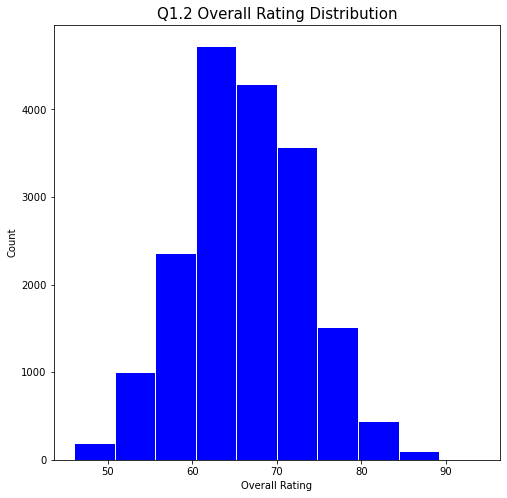

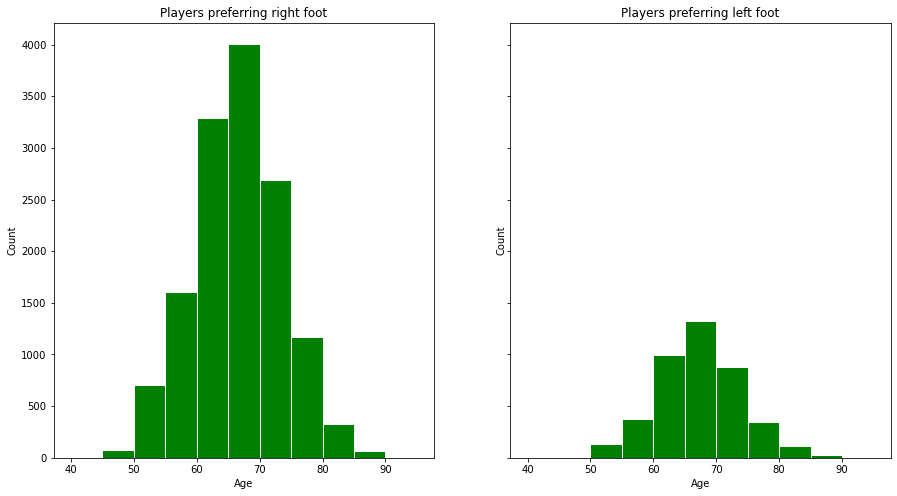

In [4]:
# SCALE Y AXIS PROPERLY and BINWIDTH or BIN NO to properly have x axis aligned with bars
plt.figure(figsize = (8,8))
plt.hist(x=df['Overall'], color = 'b', ec ='w')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.title('Q1.2 Overall Rating Distribution', fontsize=15)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey= True)
ax1.hist(x=df[df['Preferred Foot']=='Right']['Overall'], bins = range(40, 95 + 5, 5),color = "g", ec="w")
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.set_title('Players preferring right foot')
ax2.hist(x=df[df['Preferred Foot']=='Left']['Overall'], bins = range(40, 95 + 5, 5),color = "g", ec="w")
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')
ax2.set_title('Players preferring left foot')
plt.show()

Can you spot differences in the distributions?

Answer: It is evident that there exist a higher number of players who prefer the right foot as compared to players who prefer the left foot. The proportion of player count distribution with respect to age between both groups seems similar. However, the age group for players preferring the right foot spans wider (45-90 years) as compared to players preferring the left foot (50-90 years). 

### 1.3

Create a **pie chart** for distribution of Weak Foot for all the players. Get rid of players whose Weak Foot = nan. **Ensure each division is labeled properly and title is added**

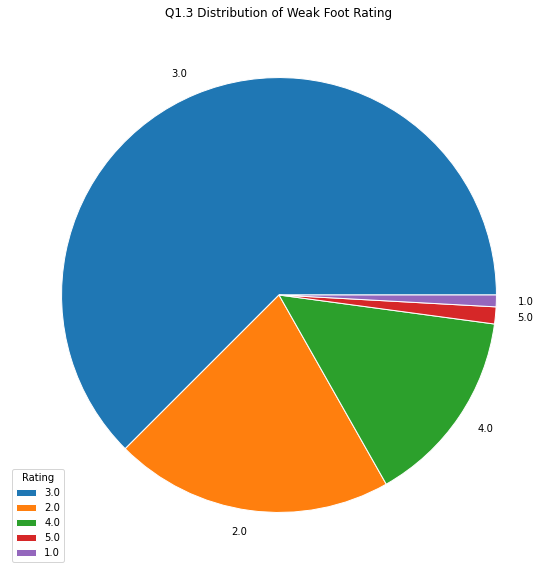

In [5]:
df1 = df.dropna(subset = ['Weak Foot'])
p = df1['Weak Foot'].value_counts().plot.pie(figsize = (10, 10), 
                 wedgeprops={"edgecolor":"w",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
p.legend(title = 'Rating', loc='best')
p.set_ylabel("")
p.set_title('Q1.3 Distribution of Weak Foot Rating')
plt.show()

### 1.4 

Create **a boxplot and a violin plot** for distributions of players' ages in different positions (similar to plots on page 92 of Lecture 1 slide). Get rid of players whose position = nan. **Ensure the axes are labeled properly**

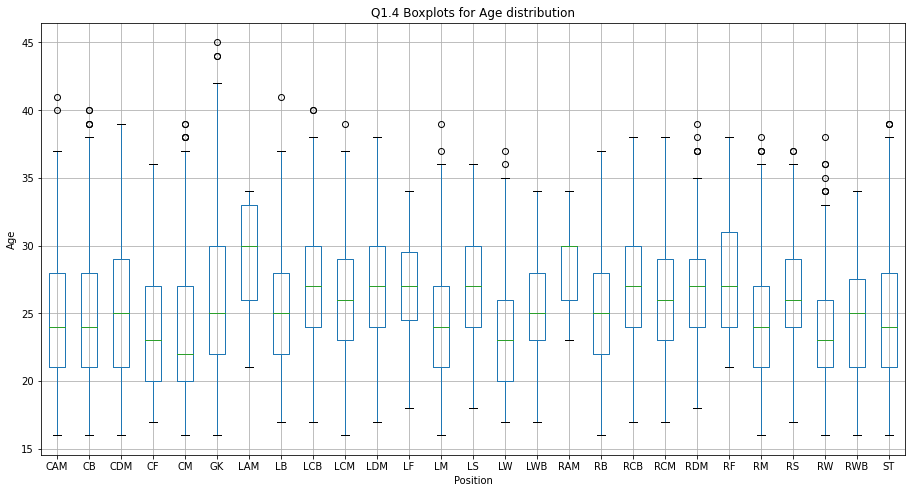

In [6]:
# Your Code Here
# Create a boxplot
import seaborn as sns

df.dropna(subset = ['Position']).boxplot(column=['Age'], by=['Position'], figsize = (15, 8))
plt.xlabel('Position')
plt.ylabel('Age')
plt.title('Q1.4 Boxplots for Age distribution')
plt.suptitle('')
plt.show()

In [13]:
df.dropna(subset = ['Position']).groupb

0         RF
1         ST
2         LW
3         GK
4        RCM
        ... 
18202     CM
18203     ST
18204     ST
18205     RW
18206     CM
Name: Position, Length: 18147, dtype: object

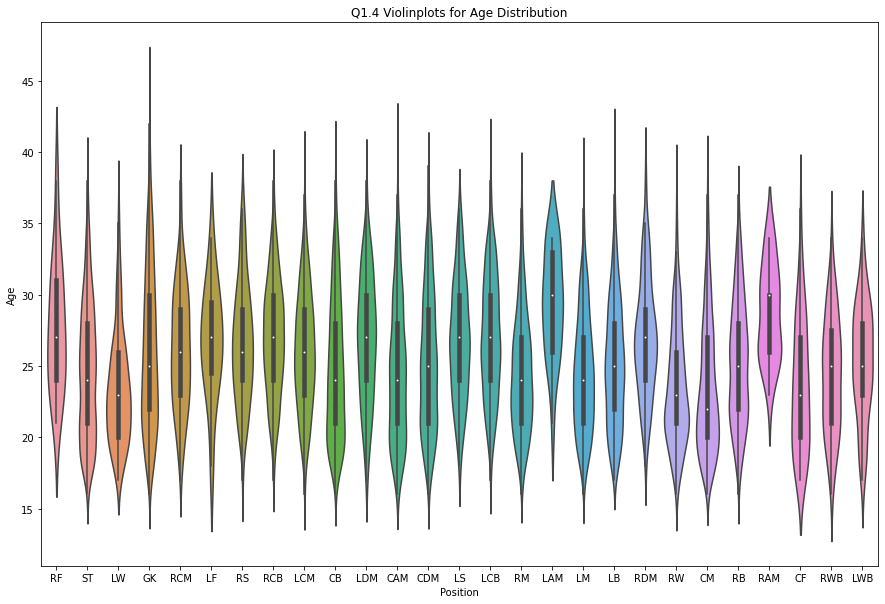

In [6]:
# Your Code Here
# Create a violin plot
df1 = df.dropna(subset = ['Position'])
plt.figure(figsize=(15,10))
sns.violinplot(x="Position", y="Age", data=df1)
plt.title("Q1.4 Violinplots for Age Distribution")
plt.show()

### 1.5
Creat a **stacked bar plot** for proportions of international reputation vs. players' ages (similar to the plot on page 97 of lecture 1 slide). **Ensure the axes and bars are labeled properly**

Note that international reputation takes value from [1,2,3,4,5]. Get rid of players whose international reputation is nan. 

Ages should be treated as intervals with width 5, i.e. the x-axis labels should be: 16 to 20, 21 to 25, 26 to 30,..., 41 to 45 

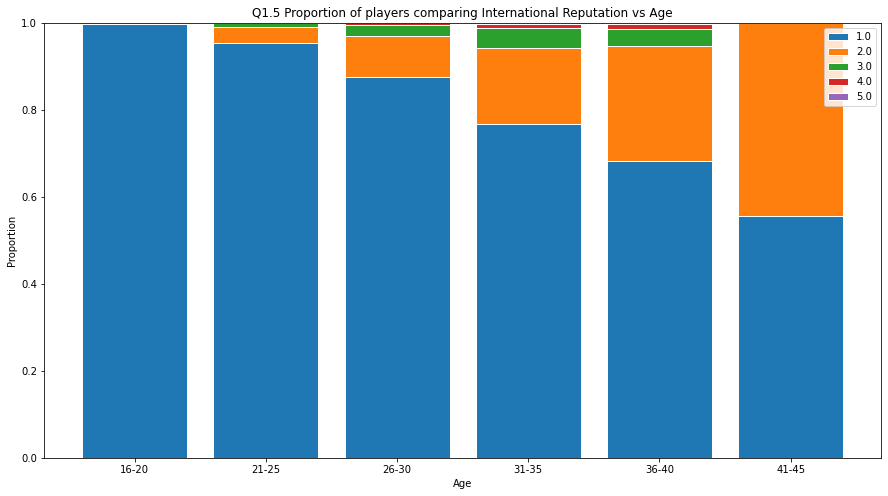

In [7]:
# Your Code Here
df15 = df[['Age', 'International Reputation']].dropna(subset = ["International Reputation"])
dff = []
for i in range (5):
    dff.append(pd.DataFrame(columns = ['Age', 'Count']))

for i in range (1,6):
    rand = df15[df15["International Reputation"]==i]
    bins = pd.cut(rand['Age'], list(range(15,47,5)))
    dff[i-1]=rand.groupby(bins)['Age'].count()

total = [0, 0, 0, 0, 0, 0]    

for i in range(6):
    for j in range(len(dff)):
        total[i] += dff[j][i]
        
sbp_df = pd.DataFrame(columns = ['Age', 'International Reputation', 'Proportion'])

for j in range(5):
    row = {'Age': '16-20',"International Reputation" : j+1,"Proportion" : dff[j][0]/total[0]}
    sbp_df = sbp_df.append(row, ignore_index = True)
    row = {'Age': '21-25',"International Reputation" : j+1,"Proportion" : dff[j][1]/total[1]}
    sbp_df = sbp_df.append(row, ignore_index = True)
    row = {'Age': '26-30',"International Reputation" : j+1,"Proportion" : dff[j][2]/total[2]}
    sbp_df = sbp_df.append(row, ignore_index = True)
    row = {'Age': '31-35',"International Reputation" : j+1,"Proportion" : dff[j][3]/total[3]}
    sbp_df = sbp_df.append(row, ignore_index = True)
    row = {'Age': '36-40',"International Reputation" : j+1,"Proportion" : dff[j][4]/total[4]}
    sbp_df = sbp_df.append(row, ignore_index = True)
    row = {'Age': '41-45',"International Reputation" : j+1,"Proportion" : dff[j][5]/total[5]}
    sbp_df = sbp_df.append(row, ignore_index = True)

y1 = np.array(sbp_df[sbp_df["International Reputation"]==1]['Proportion'])
y2 = np.array(sbp_df[sbp_df["International Reputation"]==2]['Proportion'])
y3 = np.array(sbp_df[sbp_df["International Reputation"]==3]['Proportion'])
y4 = np.array(sbp_df[sbp_df["International Reputation"]==4]['Proportion'])
y5 = np.array(sbp_df[sbp_df["International Reputation"]==5]['Proportion'])

plt.figure(figsize=(15,8))
plt.bar(sbp_df[sbp_df["International Reputation"]==1]['Age'],
            sbp_df[sbp_df["International Reputation"]==1]['Proportion'],edgecolor='w')
plt.bar(sbp_df[sbp_df["International Reputation"]==2]['Age'],
            sbp_df[sbp_df["International Reputation"]==2]['Proportion'],
       bottom=y1,edgecolor='w')
plt.bar(sbp_df[sbp_df["International Reputation"]==3]['Age'],
            sbp_df[sbp_df["International Reputation"]==3]['Proportion'],
       bottom=y1+y2,edgecolor='w')
plt.bar(sbp_df[sbp_df["International Reputation"]==4]['Age'],
            sbp_df[sbp_df["International Reputation"]==4]['Proportion'],
       bottom=y1+y2+y3,edgecolor='w')
plt.bar(sbp_df[sbp_df["International Reputation"]==5]['Age'],
            sbp_df[sbp_df["International Reputation"]==5]['Proportion'],
       bottom=y1+y2+y3+y4,edgecolor='w')
plt.xlabel("Age")
plt.ylabel("Proportion")
plt.legend(["1.0", "2.0", "3.0", "4.0", "5.0"])
plt.title("Q1.5 Proportion of players comparing International Reputation vs Age")
plt.show()

## Task 2: Data Preprocessing and Supervised Learning

Use the dataset_credit.csv for this task. The target variable is 'class'.

### 2.1

Load the data and understand the data distributions - pick a few features and plot their distributions.


In [8]:
# YOUR CODE HERE
df = pd.read_csv('dataset_credit.csv')
df['savings_status'] = df['savings_status'].str.replace("'", '')
df['employment'] = df['employment'].str.replace("'", '')
df['property_magnitude'] = df['property_magnitude'].str.replace("'",'')
df

,duration,credit_amount,savings_status,employment,property_magnitude,age,own_telephone,class
0,6,1169.0,no known savings,>=7,real estate,67,NaN,good
1,48,5951.0,<100,1<=X<4,real estate,22,NaN,bad
2,12,2096.0,<100,4<=X<7,real estate,49,NaN,good
3,42,7882.0,<100,4<=X<7,life insurance,45,none,good
4,24,4870.0,<100,1<=X<4,no known property,53,NaN,bad
...,...,...,...,...,...,...,...,...
995,12,1736.0,<100,4<=X<7,real estate,31,NaN,good
996,30,3857.0,<100,1<=X<4,life insurance,40,NaN,good
997,12,804.0,<100,>=7,car,38,none,good
998,45,NaN,<100,1<=X<4,no known property,23,yes,bad


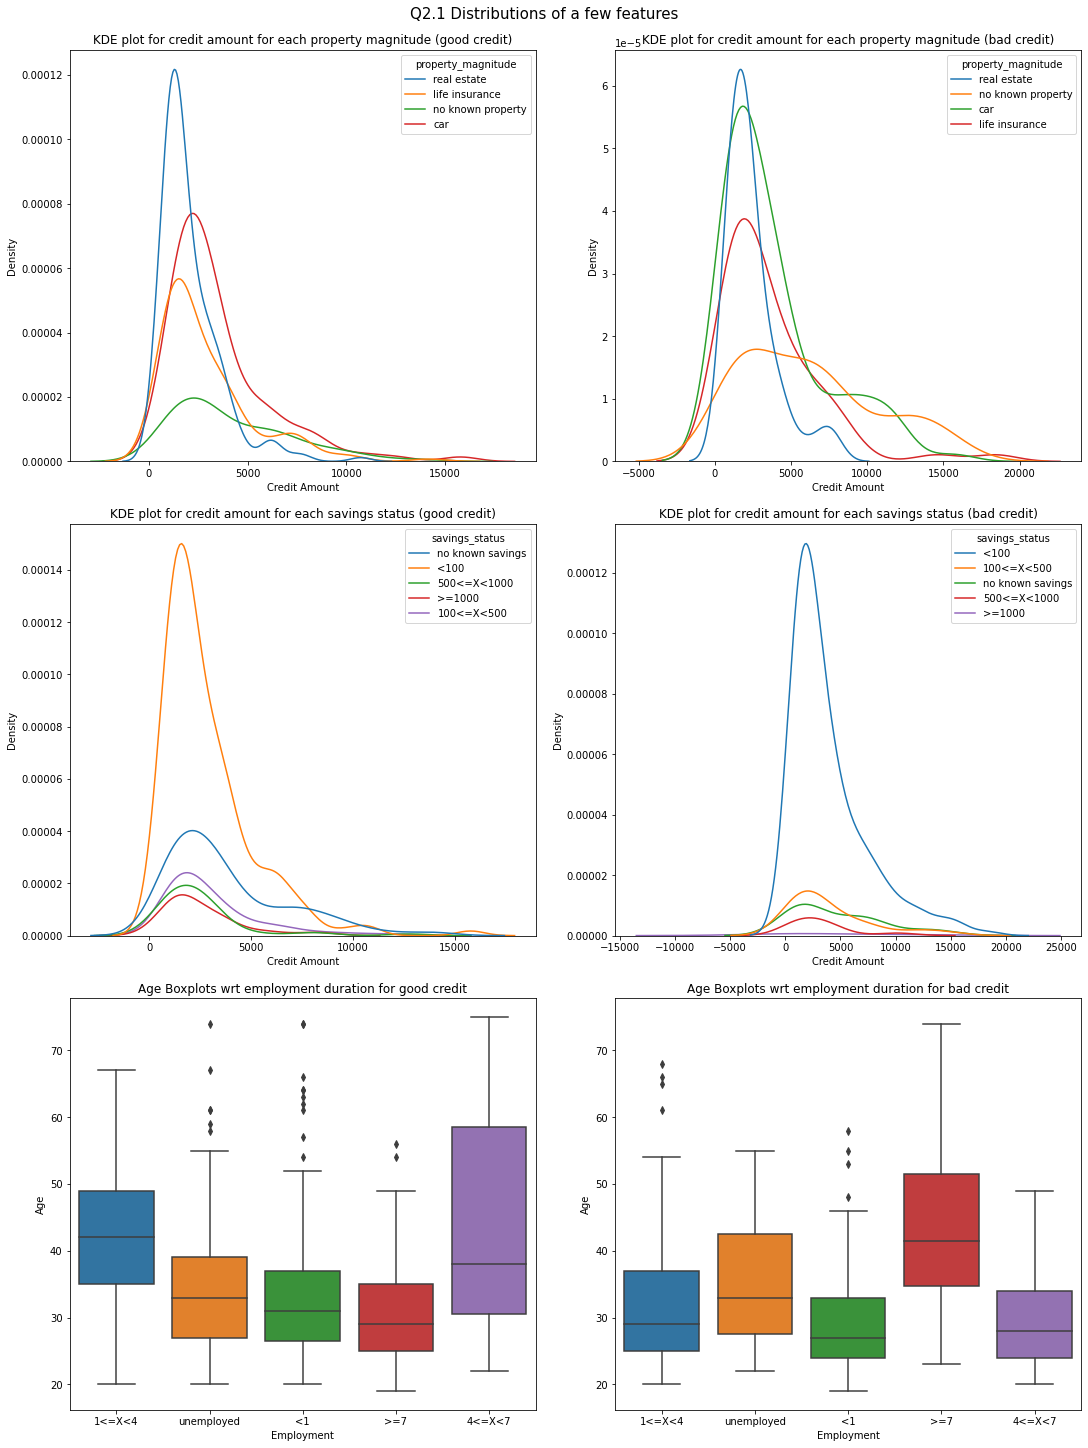

In [9]:
fig, axes = plt.subplots(3, 2, figsize = (15, 20), constrained_layout=True)
fig.suptitle('Q2.1 Distributions of a few features', fontsize = 15)

axes[0, 0].set_title("KDE plot for credit amount for each property magnitude (good credit)")
sns.kdeplot(ax = axes[0, 0], x="credit_amount",data = df[df['class']=='good'],
            hue = 'property_magnitude', fill = False)
axes[0, 0].set_xlabel('Credit Amount')
axes[0, 0].set_ylabel('Density')
# handles, labels = axes[0, 0].get_legend_handles_labels()
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
# axes[0, 0].legend(handles, labels)

axes[0, 1].set_title("KDE plot for credit amount for each property magnitude (bad credit)")
sns.kdeplot(ax = axes[0, 1], x="credit_amount",data = df[df['class']=='bad'],
            hue = 'property_magnitude', fill = False)
axes[0, 1].set_xlabel('Credit Amount')
axes[0, 1].set_ylabel('Density')

sns.kdeplot(ax = axes[1, 0], x="credit_amount",data = df[df['class']=='good'],
            hue = 'savings_status',fill = False)
axes[1, 0].set_title("KDE plot for credit amount for each savings status (good credit)")
axes[1, 0].set_xlabel('Credit Amount')
axes[1, 0].set_ylabel('Density')

sns.kdeplot(ax = axes[1, 1], x="credit_amount",data = df[df['class']=='bad'],
            hue = 'savings_status',fill = False)
axes[1, 1].set_title("KDE plot for credit amount for each savings status (bad credit)")
axes[1, 1].set_xlabel('Credit Amount')
axes[1, 1].set_ylabel('Density')

axes[2, 0].sharey(axes[2, 1])
axes[2, 0].sharex(axes[2, 1])
axes[2, 0].set_title("Age Boxplots wrt employment duration for good credit")
sns.boxplot(ax = axes[2, 0], x="employment", y="age", data=df[df['class']=='good'])
axes[2, 0].set_xlabel('Employment')
axes[2, 0].set_ylabel('Age')

axes[2, 1].set_title("Age Boxplots wrt employment duration for bad credit")
sns.boxplot(ax = axes[2, 1], x="employment", y="age", data=df[df['class']=='bad'])
axes[2, 1].set_xlabel('Employment')
axes[2, 1].set_ylabel('Age')

plt.show()

### 2.2

**Preprocessing** - does any feature need pre-processing? Would you do any scaling to numerical features? Are there any categorical features? How would you handle the categorical features? Are there any features that has missing values? What % of values are missing in each of the features? Based on this percentages, would you consider dropping any features? How about adding a missing indicator? Would you consider adding a missing indicator column?

In [10]:
# YOUR CODE HERE'
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

missing_value_percentage=df.isna().sum()/len(df)*100
print(missing_value_percentage)

duration               0.0
credit_amount          7.4
savings_status         0.0
employment             0.0
property_magnitude     0.0
age                    0.0
own_telephone         75.9
class                  0.0
dtype: float64


In [11]:
df=df.drop(['own_telephone'],axis=1)
#to keep track of entries with missing values
df['missing'] = df['credit_amount'].apply(lambda x: 1 if pd.isna(x) else 0) 

one_hot = pd.get_dummies(df, columns = ['property_magnitude'])

ord_enc_ss = OrdinalEncoder(categories = [['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000']])
df['ss_ord'] = ord_enc_ss.fit_transform(df['savings_status'].to_numpy().reshape(-1,1))

ord_enc_emp = OrdinalEncoder(categories = [['unemployed', '<1','1<=X<4', '4<=X<7', '>=7']])
df['emp_ord'] = ord_enc_emp.fit_transform(df['employment'].to_numpy().reshape(-1,1))

df=df.drop(['property_magnitude','class','age','credit_amount','duration'],axis=1)
df = pd.concat([df,one_hot],axis=1)
df=df.dropna()
df=df.drop(['missing','savings_status','employment'],axis=1)
df.head()

,ss_ord,emp_ord,duration,credit_amount,age,class,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate
0,0.0,4.0,6,1169.0,67,good,0,0,0,1
1,1.0,2.0,48,5951.0,22,bad,0,0,0,1
2,1.0,3.0,12,2096.0,49,good,0,0,0,1
3,1.0,3.0,42,7882.0,45,good,0,1,0,0
4,1.0,2.0,24,4870.0,53,bad,0,0,1,0


I have scaled all the numerical features since they have a wide range of values which shall skew the results. The rest of the features are categorical and I have applied ordinal encoding to features 'savings_status' and 'employment' since they have an underlying sense of order. I have applied one-hot encoding to 'property_magnitude' since it has no order as such. Both credit_amount and own_telephone have missing values, I have dropped the entire column corresponding to 'own_telephone' since 75.9% is missing. Meanwhile, I only drop the few rows which correspond to missing values in 'credit_amount' since only 7.4% are missing.

### 2.3

**Data splitting** - Create development & test datasets.

In [12]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(df.drop(['class'],axis=1), df['class'],
                                                    test_size=0.2, random_state=42, stratify = df['class'])

Give a reason on why did you use the particular splitting strategy.

Answer: Upon getting rid of nan values, our dataset (consisting of 1000 entries) gets trimmed down to 926 entries. Since we have a relatively small dataset, I have chosen an 80-20 split between development and testing in order to have as much training data as possible, while still having enough test data to check the model's accuracy. I have also stratified the dataset split in order to account for the target class imbalance in the development and test sets.

### 2.4

**Model selection** - Lets use k-nearest neighbors to train a model. Pick 2 out of 4 model selection strategies discussed in class to compare the optimal k chosen from both the methods. Also compare the results from grid search v.s. random search for finding the optimal k.

In [40]:
# YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.impute import SimpleImputer
knn_pipe = make_pipeline(MinMaxScaler(),KNeighborsClassifier())

param_grid = {'kneighborsclassifier__n_neighbors': range(1, 20)}
param_grid1 = {'kneighborsclassifier__n_neighbors': range(1, 50)}


#Stratified K Fold CV

sfold = StratifiedKFold(n_splits=5, shuffle=False)
grid1 = GridSearchCV(knn_pipe, param_grid, cv=sfold)

grid1.fit(X_dev, y_dev)
print('Analysis for Stratified K-Fold CV\n')
print('Optimal value of k for Gridsearch: ',grid1.best_params_['kneighborsclassifier__n_neighbors'])
print('Best Score: ',grid1.score(X_dev, y_dev),'\n')

rand1 = RandomizedSearchCV(knn_pipe, param_distributions=param_grid1, cv=sfold)
rand1.fit(X_dev, y_dev)
print('Optimal value of k for Randomsearch: ',rand1.best_params_['kneighborsclassifier__n_neighbors'])
print('Best Score: ',rand1.score(X_dev, y_dev),'\n\n')


#K-Fold CV


grid2 = GridSearchCV(knn_pipe, param_grid, cv=5)
grid2.fit(X_dev, y_dev)
print('Analysis for K-Fold CV\n')
print('Optimal value of k for Gridsearch: ',grid2.best_params_['kneighborsclassifier__n_neighbors'])
print('Best Score: ',grid2.score(X_dev, y_dev),'\n')


rand2 = RandomizedSearchCV(knn_pipe, param_distributions=param_grid1, cv=5)
rand2.fit(X_dev, y_dev)
print('Optimal value of k for Randomsearch: ',rand2.best_params_['kneighborsclassifier__n_neighbors'])
print('Best Score: ',rand2.score(X_dev, y_dev))

Analysis for Stratified K-Fold CV

Optimal value of k for Gridsearch:  19
Best Score:  0.731081081081081 

Optimal value of k for Randomsearch:  35
Best Score:  0.727027027027027 


Analysis for K-Fold CV

Optimal value of k for Gridsearch:  19
Best Score:  0.731081081081081 

Optimal value of k for Randomsearch:  17
Best Score:  0.731081081081081


### 2.5

Compare the performance of 4 models (2 model selection strategies & 2 hyperparameter search strategies) on the test set. Which combination performs the best? Any reasons why this combination gives the best performance?


In [41]:
# YOUR CODE HERE
print('Stratified K-Fold CV with gridsearch: ', grid1.score(X_test,y_test))
print('Stratified K-Fold CV with randomsearch: ', rand1.score(X_test,y_test))
print('K-Fold CV with gridsearch: ', grid2.score(X_test,y_test))
print('K-Fold CV with randomsearch', rand2.score(X_test,y_test))

Stratified K-Fold CV with gridsearch:  0.7150537634408602
Stratified K-Fold CV with randomsearch:  0.7311827956989247
K-Fold CV with gridsearch:  0.7150537634408602
K-Fold CV with randomsearch 0.7150537634408602


### Answer
I am getting the best performance with the combination of Stratified K-Fold CV with random search. This makes sense since we know that randomsearch-based hyperparameter tuning can more efficiently span the parameter space and Stratified K-Fold CV model selection takes into account the imbalance of classes and thus gives a better value for K. 